In [114]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/국토안전관리원_공공건축물 에너지 소비량_20230331.csv',encoding='cp949')

In [115]:
# 필요한 열 선택
data = data[['지역', '용도', '기관유형','연면적', '냉난방면적', '지하', '지상', '연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값', '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균', '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균', '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균','연간 단위면적당 1차 에너지 소비량 3개년 평균','사용승인연도']]

In [116]:
import numpy as np

# '미제출' 값을 NaN으로 변환
data.replace('미제출', np.nan, inplace=True)

In [117]:
data.isna().sum()

지역                                         0
용도                                         0
기관유형                                       0
연면적                                        0
냉난방면적                                      0
지하                                       145
지상                                         5
연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값             0
간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균      0
간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균      0
간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균      0
연간 단위면적당 1차 에너지 소비량 3개년 평균               243
사용승인연도                                     0
dtype: int64

In [118]:
# 각 고유 값의 개수 확인
value_counts = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].value_counts(dropna=False)

# 결과 출력
print(value_counts)

연간 단위면적당 1차 에너지 소비량 3개년 평균
NaN       243
0          29
18.31      12
34.67       9
27.38       7
         ... 
53.46       1
136.69      1
52.96       1
29.35       1
26.46       1
Name: count, Length: 2836, dtype: int64


In [119]:
# 결측치 삭제 (연간 단위면적당 1차 에너지 소비량 3개년 평균 칼럼에서 결측치가 있는 행 제거)
data.dropna(subset=['연간 단위면적당 1차 에너지 소비량 3개년 평균'], inplace=True)

In [120]:
data.isna().sum()

지역                                         0
용도                                         0
기관유형                                       0
연면적                                        0
냉난방면적                                      0
지하                                       139
지상                                         5
연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값             0
간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균      0
간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균      0
간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균      0
연간 단위면적당 1차 에너지 소비량 3개년 평균                 0
사용승인연도                                     0
dtype: int64

In [121]:
# 데이터의 고유 값 확인
actual_regions = data['지역'].unique()
actual_usages = data['용도'].unique()

In [122]:
actual_regions

array(['중부1지역', '중부2지역', '남부지역', '제주도'], dtype=object)

In [123]:
actual_usages

array(['문화 및 집회시설', '운수시설', '의료시설', '교육연구시설', '수련시설', '업무시설'],
      dtype=object)

In [124]:
# 모든 열을 문자열로 변환
data['연면적'] = data['연면적'].astype(str)
data['냉난방면적'] = data['냉난방면적'].astype(str)
data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].astype(str)

# 쉼표 제거 후 데이터 타입 변환
data['연면적'] = data['연면적'].str.replace(',', '').astype(float)
data['냉난방면적'] = data['냉난방면적'].str.replace(',', '').astype(float)
data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].str.replace(',', '').astype(float)

In [125]:
# '사용승인연도' 칼럼에서 연도만 추출하여 int형으로 변환
data['사용승인연도'] = data['사용승인연도'].astype(str).str[:4].astype(int)

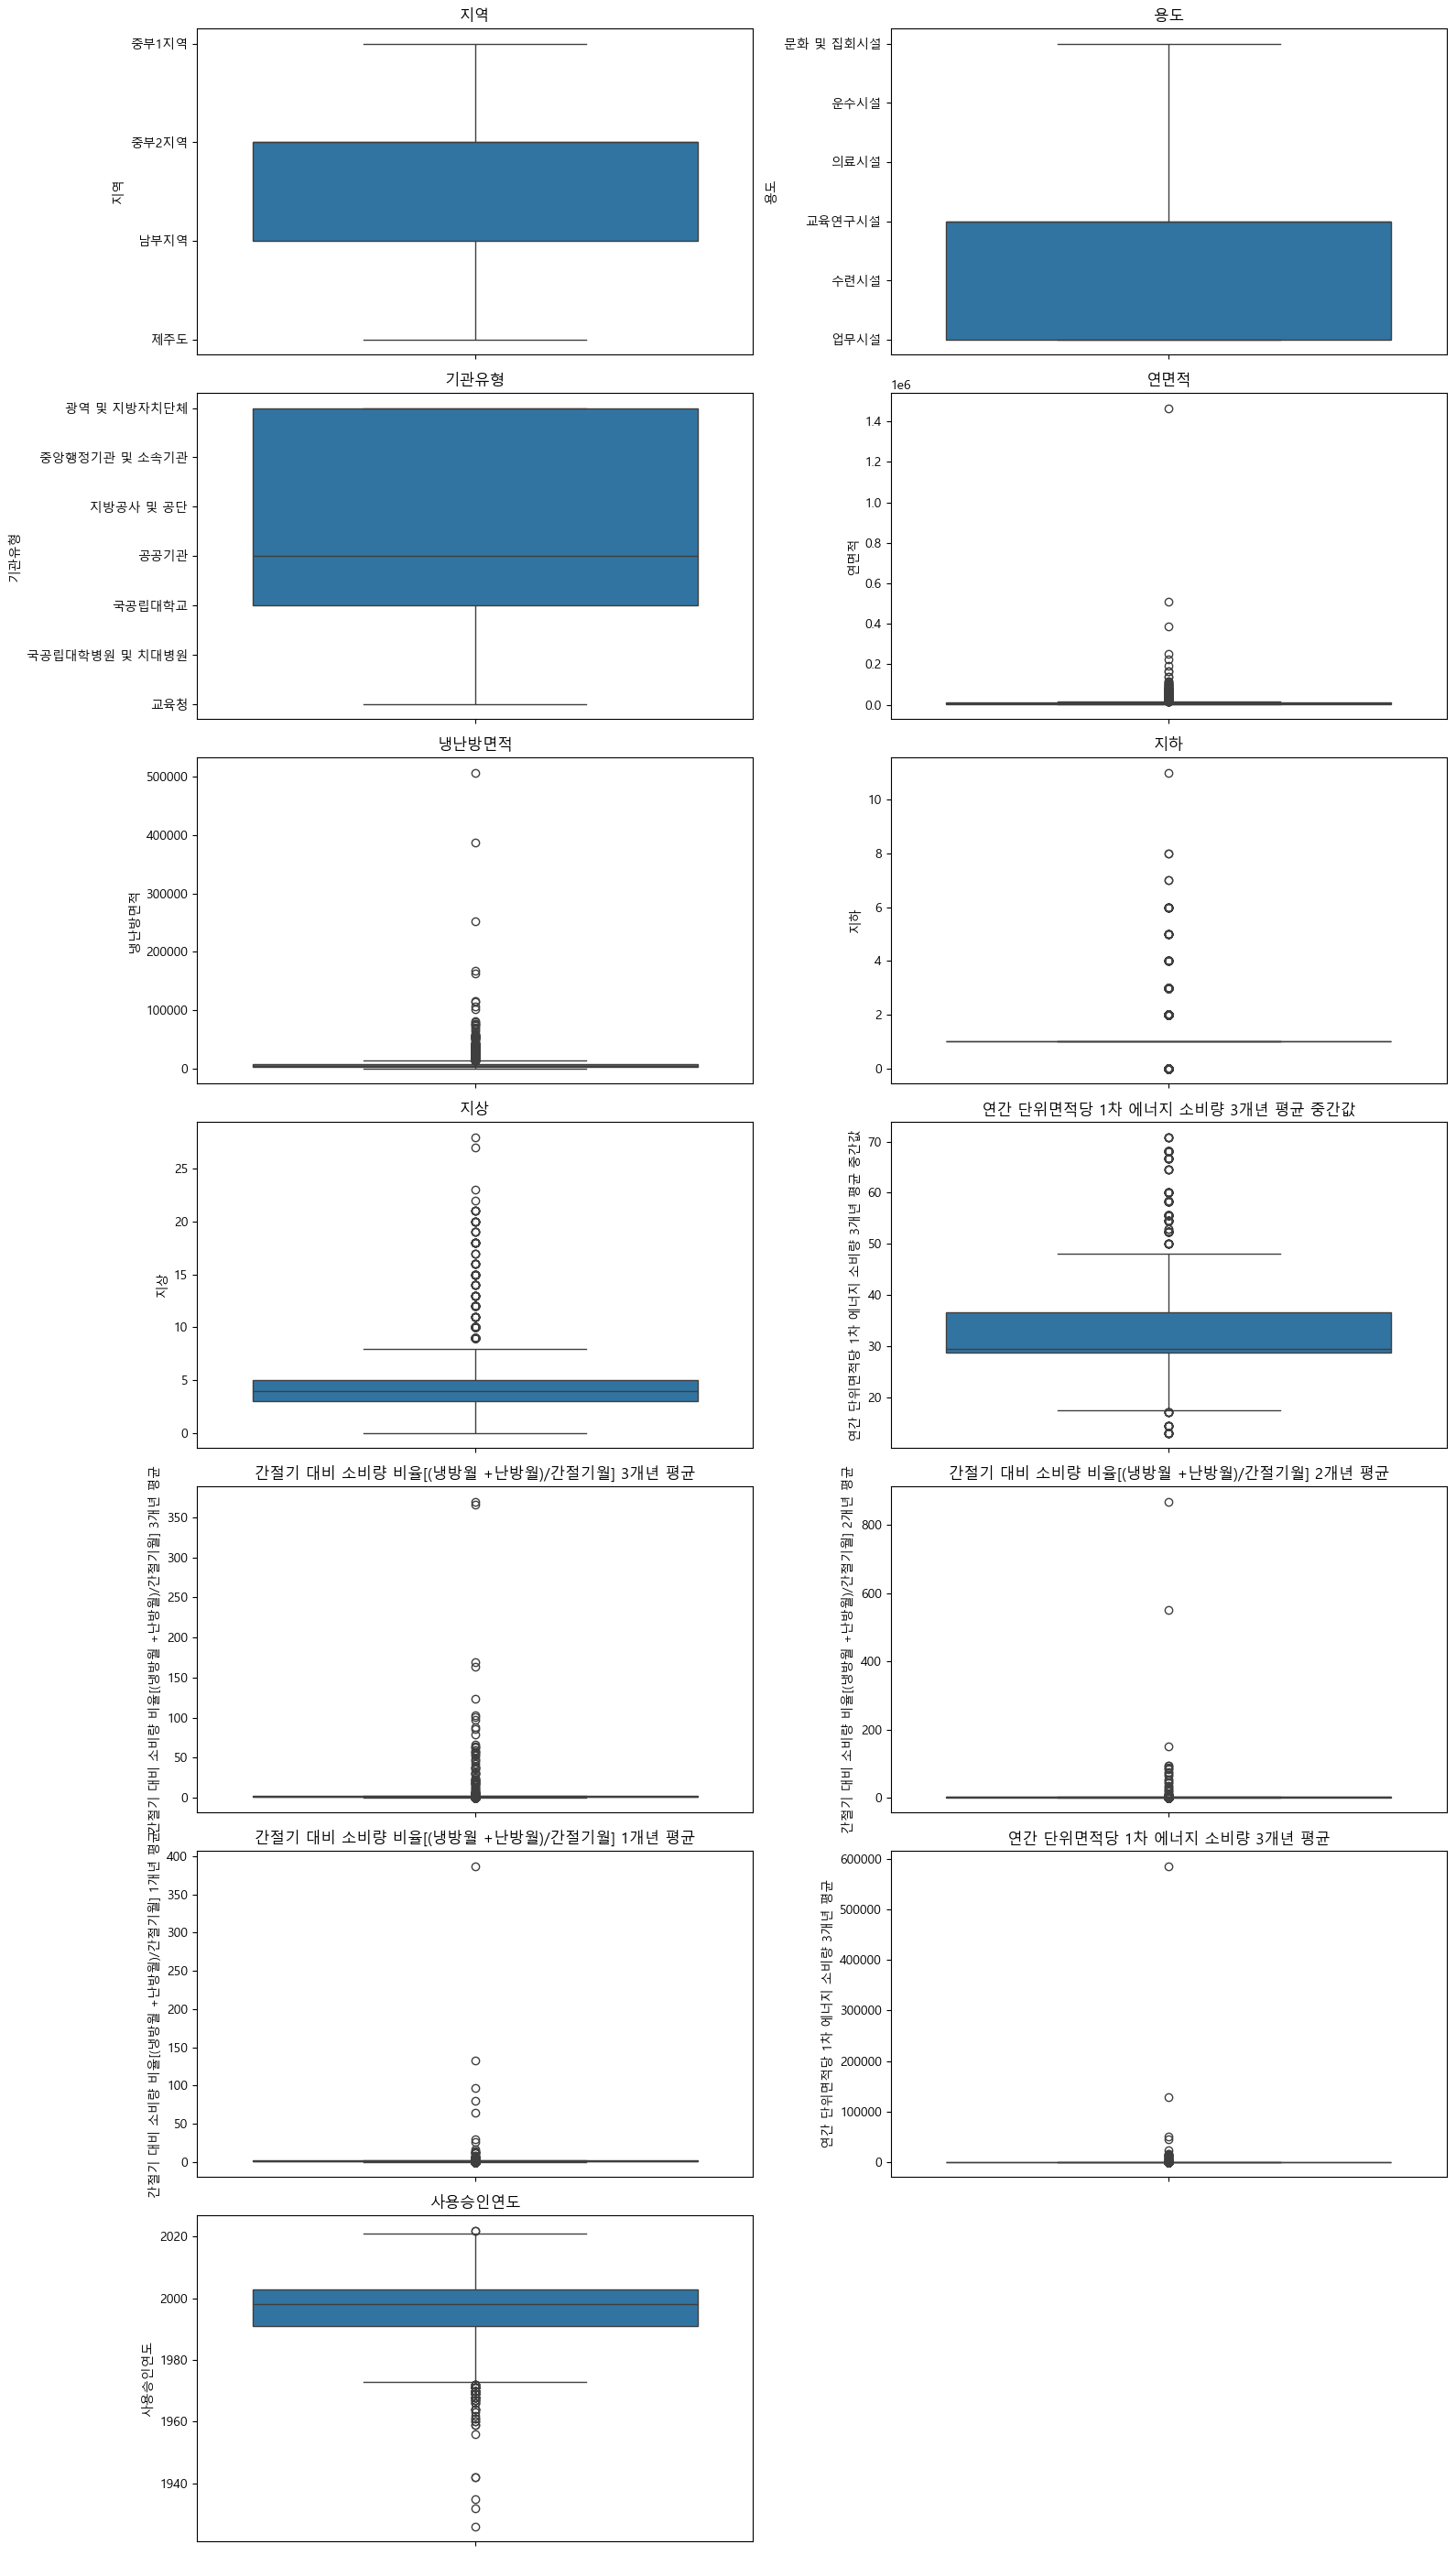

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 박스플롯 그리기
num_cols = len(data.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 배치하는 경우의 행 수 계산

plt.figure(figsize=(16, num_rows * 4))

# 각 칼럼에 대한 박스플롯 그리기
for i, col in enumerate(data.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

연면적은 0.1 이상 , 

냉난방면적은 100000 이상 , 

간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균 은 50이상 , 

간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균 은 100이상 , 

간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균 은 50이상 , 

연간 단위면적당 1차 에너지 소비량 3개년 평균 은 1000이상 은 이상치로 간주

In [133]:
# 이상치 기준에 따른 필터링
data_filtered = data[
    (data['연면적'] >= 0.1) & 
    (data['냉난방면적'] < 100000) &
    (data['간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균'] < 50) & 
    (data['간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균'] < 100) & 
    (data['간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균'] < 50) & 
    (data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] < 1000)
]

# 결과 확인
print("이상치 제거 후 데이터 수:", data.shape[0])
print(data.describe())


이상치 제거 후 데이터 수: 3726
                지역           용도           연면적         냉난방면적           지하  \
count  3726.000000  3726.000000   3726.000000   3726.000000  3591.000000   
mean      1.969941     1.641975   9043.712641   7114.498092     1.146199   
std       1.355341     1.565774   9952.904480   7512.273728     0.757919   
min       0.000000     0.000000   3000.000000     15.000000     0.000000   
25%       0.000000     0.000000   4152.735000   3430.467500     1.000000   
50%       3.000000     1.000000   5880.360000   4792.750000     1.000000   
75%       3.000000     3.000000   9370.992500   7591.250000     1.000000   
max       3.000000     5.000000  99820.860000  81551.000000    11.000000   

                지상  연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값  \
count  3721.000000                     3726.000000   
mean      4.596345                       32.504034   
std       2.528425                        8.744865   
min       0.000000                       13.090000   
25%       3.000000      

이상치 처리후 확인

In [135]:
# 박스플롯 그리기
num_cols = len(data.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 배치하는 경우의 행 수 계산

plt.figure(figsize=(16, num_rows * 4))

# 각 칼럼에 대한 박스플롯 그리기
for i, col in enumerate(data.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [129]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_encoder_region = LabelEncoder()
label_encoder_usage = LabelEncoder()

data['지역'] = label_encoder_region.fit_transform(data['지역'])
data['용도'] = label_encoder_usage.fit_transform(data['용도'])

In [130]:
# 인코딩된 데이터 확인
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3726 entries, 1 to 4003
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   지역                                     3726 non-null   int32  
 1   용도                                     3726 non-null   int32  
 2   기관유형                                   3726 non-null   object 
 3   연면적                                    3726 non-null   float64
 4   냉난방면적                                  3726 non-null   float64
 5   지하                                     3591 non-null   float64
 6   지상                                     3721 non-null   float64
 7   연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값         3726 non-null   float64
 8   간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균  3726 non-null   float64
 9   간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균  3726 non-null   float64
 10  간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균  3726 non-null   float64
 11  연간 단위면적당 

In [131]:
# 라벨 인코딩된 값을 확인하기 위해 라벨과 매핑된 숫자를 출력
print("지역 인코딩 매핑:")
for index, label in enumerate(label_encoder_region.classes_):
    print(f"{label}: {index}")

print("\n용도 인코딩 매핑:")
for index, label in enumerate(label_encoder_usage.classes_):
    print(f"{label}: {index}")

지역 인코딩 매핑:
남부지역: 0
제주도: 1
중부1지역: 2
중부2지역: 3

용도 인코딩 매핑:
교육연구시설: 0
문화 및 집회시설: 1
수련시설: 2
업무시설: 3
운수시설: 4
의료시설: 5


In [132]:
# 전처리된 데이터 저장
output_path = "C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/preprocessed_data(국토안전관리원_공공건축물 에너지 소비량_20230331.csv).csv"
data.to_csv(output_path, index=False, encoding='cp949')